# Video Games Analysis

In [113]:
import pandas as pd

movies = pd.read_csv('/Users/chrisraddatz/imdb-videogames.csv')
soccer = pd.read_csv('/Users/chrisraddatz/FIFA-21 Complete.csv')
import warnings
warnings.filterwarnings('ignore')

In [114]:
movies.head()

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False


There's a column that serves as index, we don't need that. Other columns that don't seem very relevant to visualization/analysis are:
- Url
- Plot

In [115]:
movies.columns

Index(['Unnamed: 0', 'name', 'url', 'year', 'certificate', 'rating', 'votes',
       'plot', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')

In [116]:
drop_cols = ['Unnamed: 0', 'url', 'plot']
movies.drop(columns = drop_cols, inplace = True)

In [117]:
print(movies.shape)
print(movies.info())

(20803, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         20803 non-null  object 
 1   year         20536 non-null  float64
 2   certificate  7903 non-null   object 
 3   rating       11600 non-null  float64
 4   votes        11600 non-null  object 
 5   Action       20803 non-null  bool   
 6   Adventure    20803 non-null  bool   
 7   Comedy       20803 non-null  bool   
 8   Crime        20803 non-null  bool   
 9   Family       20803 non-null  bool   
 10  Fantasy      20803 non-null  bool   
 11  Mystery      20803 non-null  bool   
 12  Sci-Fi       20803 non-null  bool   
 13  Thriller     20803 non-null  bool   
dtypes: bool(9), float64(2), object(3)
memory usage: 995.6+ KB
None


In [118]:
movies.head()

,name,year,certificate,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018.0,T,9.2,"20,759",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018.0,M,9.7,"35,703",True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013.0,M,9.5,"59,986",True,False,False,True,False,False,False,False,False
3,God of War,2018.0,M,9.6,"26,118",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016.0,T,9.5,"28,722",True,True,False,False,False,False,False,False,False


This dataset has 20803 rows of data with 14 descriptive columns. That's more than enough data to the points where we can remove rows that aren't fully complete. 

In [119]:
movies['year'].isnull().value_counts() 

False    20536
True       267
Name: year, dtype: int64

This indicates that some of the columns have null values, let's seek those out and remove them.

### Cleaning

In [120]:
for c in movies.columns:
    counts = movies[c].isnull().value_counts()
    print("The number of null values within this columns is: {}\n".format(counts))

The number of null values within this columns is: False    20803
Name: name, dtype: int64

The number of null values within this columns is: False    20536
True       267
Name: year, dtype: int64

The number of null values within this columns is: True     12900
False     7903
Name: certificate, dtype: int64

The number of null values within this columns is: False    11600
True      9203
Name: rating, dtype: int64

The number of null values within this columns is: False    11600
True      9203
Name: votes, dtype: int64

The number of null values within this columns is: False    20803
Name: Action, dtype: int64

The number of null values within this columns is: False    20803
Name: Adventure, dtype: int64

The number of null values within this columns is: False    20803
Name: Comedy, dtype: int64

The number of null values within this columns is: False    20803
Name: Crime, dtype: int64

The number of null values within this columns is: False    20803
Name: Family, dtype: int64

The numb

In [121]:
movies = movies[movies['year'].isnull() == False]
movies = movies.reset_index(drop = True)

There are actually quite a few columns that have a lot of null values, let's see what we can do retain those that have a majority stake within the dataset. 
Columns such as: 
- certificate
- rating
- votes

In [122]:
null_certificates = movies[movies['certificate'].isnull() == True]

#null_certificates = (movie (if movie['certificate'].isnull() == True) for movie in movies)

In [125]:
cert_rating_votes_clear = (movies[col.isnull() == False] for col in ['certificate','rating','votes'])

In [126]:
cert_rating_votes_clear

<generator object <genexpr> at 0x7ff1797015f0>

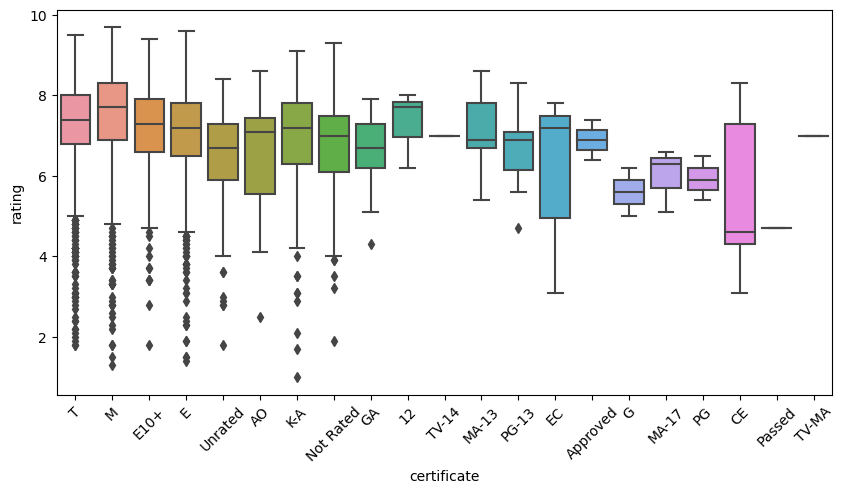

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

sns.boxplot(movies['certificate'], movies['rating'])

plt.xticks(rotation = 45)
plt.show()